Exploratory data analysis using Python on music-related datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [14]:
# Loading and exploring the datasets

In [5]:
df_tracks = pd.read_csv(r"C:\Python\Projects\Spotify\tracks.csv")
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [6]:
df_features = pd.read_csv(r"C:\Python\Projects\Spotify\SpotifyFeatures.csv")
df_features.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [21]:
df_artists = pd.read_csv(r"C:\Python\Projects\Spotify\artists.csv")
df_artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [15]:
# Checking for null values in tracks dataframe

In [8]:
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [9]:
# Checking the number of columns and rows in the dataframe
df_tracks.shape

(586672, 20)

In [ ]:
# Which artist has the largest amount of followers?

In [10]:
df_artists.sort_values('followers', ascending=False).head(5)

,id,followers,genres,name,popularity
144138,6eUKZXaKkcviH0Ku9w2n3V,78900234.0,"['pop', 'uk pop']",Ed Sheeran,92
144485,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"['pop', 'post-teen pop']",Ariana Grande,95
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
144488,7dGJo4pcD2V6oG8kP0tJRR,43747833.0,"['detroit hip hop', 'hip hop', 'rap']",Eminem,94


In [11]:
filtered_artists = df_artists.sort_values('followers', ascending=False)

In [ ]:
#I Love metal music so I am curious to see the top 10 artists in Spotify

In [26]:
metal = filtered_artists[filtered_artists['genres'].apply(lambda x: 'metal' in x)]
metal.sort_values('followers', ascending=False)

metal_top10 = metal[:10]

In [ ]:
# Plotting the top 10 metal bandas with the highest amount of followers


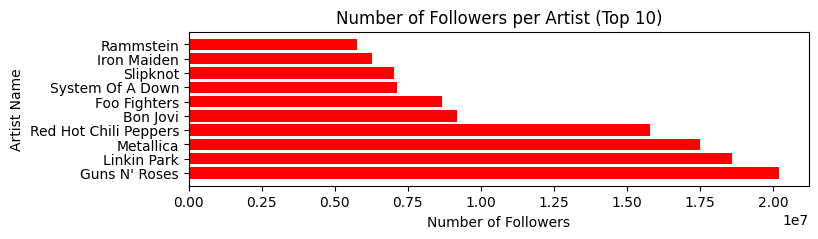

In [29]:
# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 2))
ax.barh(metal_top10['name'], metal_top10['followers'], color='red')
ax.set_xlabel('Number of Followers')
ax.set_ylabel('Artist Name')
ax.set_title('Number of Followers per Artist (Top 10)')
plt.show()

In [ ]:
# Most popular songs

In [13]:
sorted_tacks = df_tracks.sort_values('popularity', ascending=False)
sorted_tacks[['artists','popularity','name']].head(10)

,artists,popularity,name
93802,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100,Peaches (feat. Daniel Caesar & Giveon)
93803,['Olivia Rodrigo'],99,drivers license
93804,['Masked Wolf'],98,Astronaut In The Ocean
92810,['The Weeknd'],97,Save Your Tears
92811,['Kali Uchis'],97,telepatía
93805,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96,Leave The Door Open
92813,['The Weeknd'],96,Blinding Lights
92814,['Tiësto'],95,The Business
92816,['Giveon'],94,Heartbreak Anniversary
92819,"['Myke Towers', 'Juhn']",94,Bandido


In [42]:
#Exploring tracks dataframe
# Checking for correlations: Create a heatmap

C:\Users\gasto\AppData\Local\Temp\ipykernel_3788\1850818518.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tracks_correlation_matrix = df_tracks.corr()


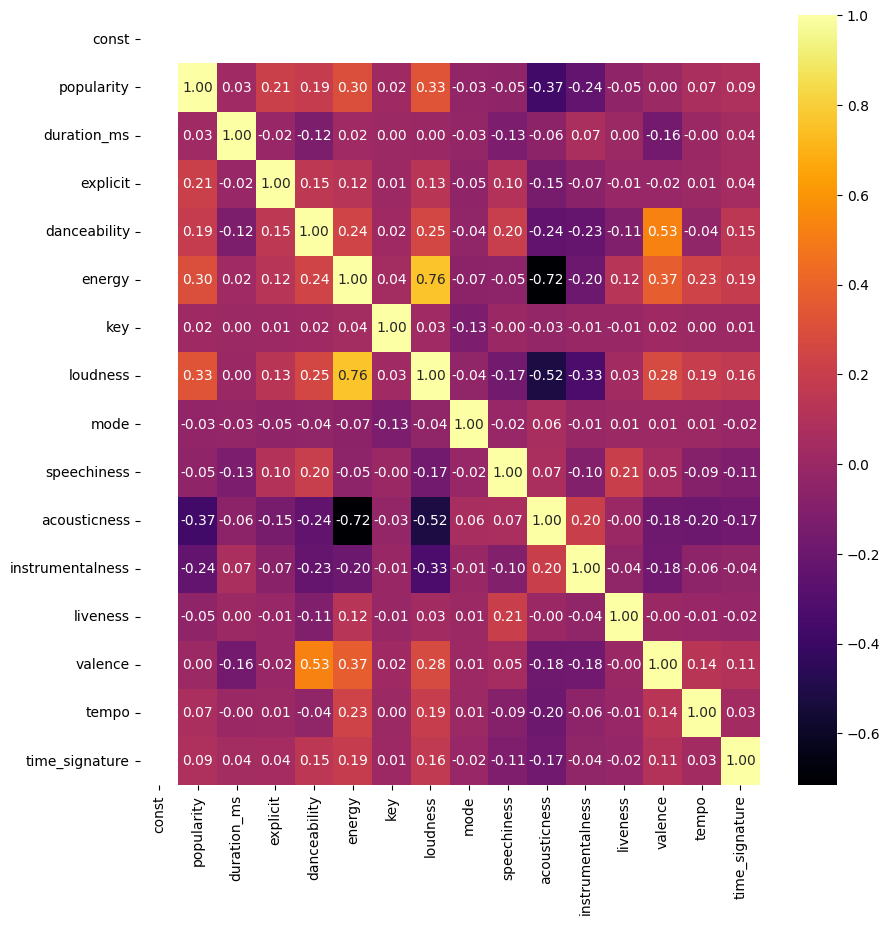

In [40]:
tracks_correlation_matrix = df_tracks.corr()
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tracks_correlation_matrix, cmap='inferno', annot=True, ax=ax, fmt='.2f')

# Show the plot
plt.show()


In [41]:
# Smaller heatmap with values >.5


<AxesSubplot: >

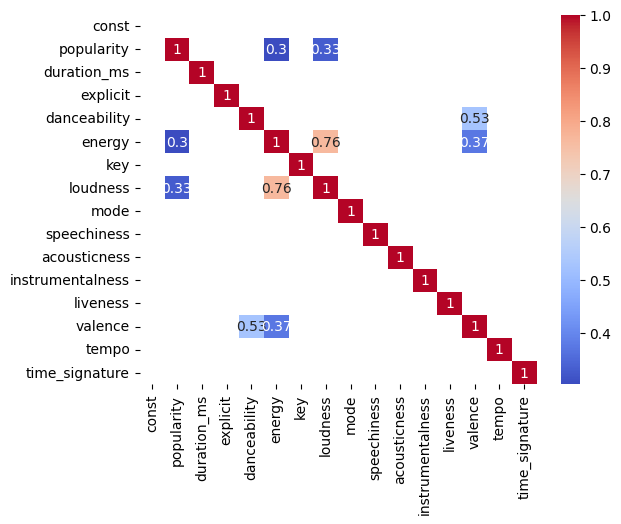

In [45]:
specific_matrix = tracks_correlation_matrix[tracks_correlation_matrix > 0.3]
sns.heatmap(specific_matrix, cmap='coolwarm', annot=True)

In [46]:
df_popularity_dance = df_tracks.describe()[['popularity','energy']]
df_popularity_dance

,popularity,energy
count,586672.000000,586672.000000
mean,27.570053,0.542036
std,18.370642,0.251923
min,0.000000,0.000000
25%,13.000000,0.343000
50%,27.000000,0.549000
75%,41.000000,0.748000
max,100.000000,1.000000


In [50]:
# Some observations:
# The mean popularity of the songs is 27.57 out of 100, with a standard deviation of 18.37. This indicates that the popularity of songs varies widely across the dataset.
# The mean energy of the songs is 0.542, with a standard deviation of 0.251. This indicates that the energy level of songs also varies widely across the dataset.
# The minimum popularity of the songs is 0 and the maximum is 100, indicating that the dataset includes both unpopular and very popular songs.
# Similarly, the minimum energy level of the songs is 0 and the maximum is 1.0, indicating that the dataset includes both low-energy and high-energy songs.
# The 25th percentile of popularity is 13, which means that 25% of the songs in the dataset have a popularity score of 13 or lower.
# The 75th percentile of popularity is 41, which means that 25% of the songs in the dataset have a popularity score of 41 or higher.
# The 25th percentile of energy level is 0.343, which means that 25% of the songs in the dataset have an energy score of 0.343 or lower.
# The 75th percentile of energy level is 0.748, which means that 25% of the songs in the dataset have an energy score of 0.748 or higher.

In [3]:
# Question: Is popularity correlated to danceability?

In [47]:
# add a constant term to the DataFrame to allow for an intercept term in the regression
df_tracks = sm.add_constant(df_tracks)

# fit a linear regression model to the data
model = sm.OLS(df_tracks['popularity'], df_tracks[['const', 'energy']]).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                 5.901e+04
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:03:56   Log-Likelihood:            -2.5120e+06
No. Observations:              586672   AIC:                         5.024e+06
Df Residuals:                  586670   BIC:                         5.024e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6207      0.054    287.976      0.0

In [49]:
# The coefficient for the 'energy' variable is 22.0453, which means that, 
# on average, a one-unit increase in 'energy' is associated with a 22.0453-unit increase in 'popularity'. 
# The p-value for the 'energy' variable is very small (0.000), 
# which indicates that the coefficient for the 'energy' variable is statistically significant.
# Therefore, we can conclude that there is a positive relationship between the 'energy' and 'popularity' variables.
# However, given the relatively low R-squared value, we can also conclude that the 'energy' 
# variable alone is not a strong predictor of the 'popularity' variable. 
# Other factors may also be influencing the popularity of the songs in this dataset.